In [1]:
# dont ask me, and I won't clean it..
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np
from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
! wget "https://ndownloader.figshare.com/files/22257501" -O data.tar.gz

--2020-04-09 16:18:34--  https://ndownloader.figshare.com/files/22257501
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.17.177.69, 34.248.20.83, 52.17.160.125, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.17.177.69|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22257501/data.tar.gz [following]
--2020-04-09 16:18:35--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22257501/data.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.40.67
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.40.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251986929 (240M) [application/gzip]
Saving to: ‘data.tar.gz’

data.tar.gz         100%[===================>] 240.31M  20.5MB/s    in 13s     

2020-04-09 16:18:48 (18.6 MB/s) - ‘data.tar.gz’ saved [251986929/251986929]



In [3]:
!tar -xvf data.tar.gz > /dev/null
! echo "Untaring... done..."

tar: data: implausibly old time stamp 1969-12-31 18:30:00
Untaring... done...


In [4]:
png_files = glob.glob('data/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Total # of files =>  24000


'data/8405_mmfYk.png'

In [5]:
symbols = "abcdefghijklmnopqrstuvwxyz"+"ABCDEFGHIJKLMNOPQRSTUVWXYZ" + '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_, num_symbols)

(80, 190, 4) 62


In [0]:
# image = cv2.imread(png_files[0], 0)
# #letters = splitext(file)[0]
# level = 2
# # blur
# k = np.ones((5,5),np.float32)/25
# dst = cv2.filter2D(image,-1,k)

# # threshold
# ret, image = cv2.threshold(dst, 110, 255, cv2.THRESH_BINARY_INV)
# image = cv2.erode(image, kernel, iterations = level)

# connectivity = 4
# output = cv2.connectedComponentsWithStats(image, connectivity, cv2.CV_32S)
# #blur = cv2.blur(img,(5,5))
# plt.imshow(output[1])
# plt.show()

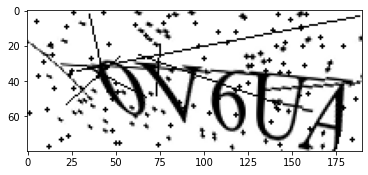

In [7]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img)
plt.show()

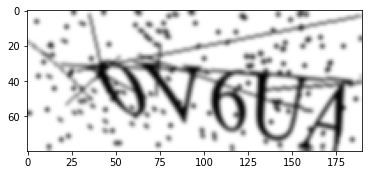

In [8]:
blur = img.copy()
blur.astype(dtype=np.uint8)
for item in range(2):
    #blur = cv2.blur(blur,(5,5))
    blur = cv2.GaussianBlur(blur,(3,3),0)
#blur = cv2.blur(img,(5,5))
plt.imshow(blur[:,:,:])
plt.show()

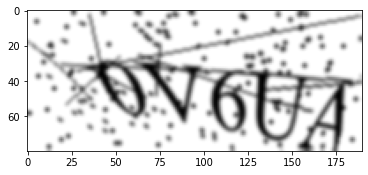

In [9]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

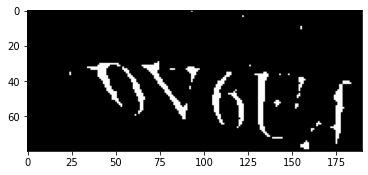

In [10]:
ret,thresh2 = cv2.threshold(gray,80,125,cv2.THRESH_BINARY)
thresh2.astype(np.uint16)
thresh2 = 255-thresh2
plt.imshow(thresh2,cmap='gray')
plt.show()

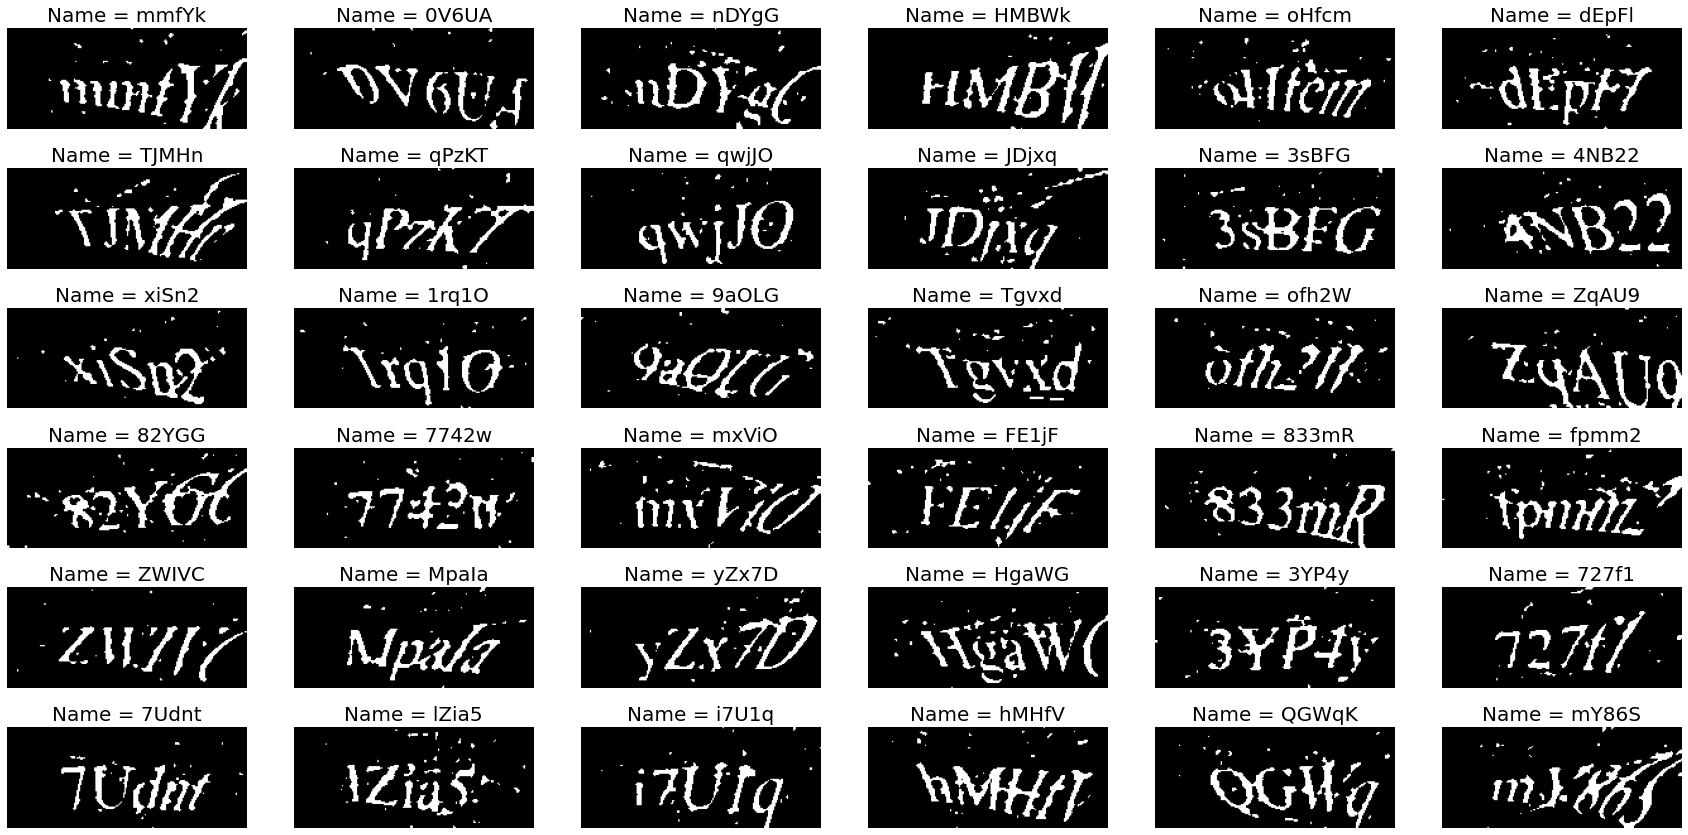

In [11]:
kernel = np.ones((2,2),np.uint8)

total_img = 36
num_pr = 6 # number per row
#kernel1 = np.ones((3,3),np.float32)/9
counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  img = cv2.imread(item,cv2.IMREAD_UNCHANGED)
  blur = img.copy()
  blur.astype(dtype=np.uint8)
  for k in range(2):
      blur = cv2.blur(blur,(3,3))
      #blur = cv2.GaussianBlur(blur,(3,3),0)
  gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
  ret,thresh2 = cv2.threshold(gray,115,180,cv2.THRESH_BINARY)
  thresh2.astype(np.uint16)
  thresh2 = 255-thresh2
  #output = cv2.connectedComponentsWithStats(thresh2, 4, cv2.CV_32S)
  #cv2.erode(image, kernel, iterations = level)
  #erosion = cv2.erode(adapt_thres,kernel,iterations = 2)
  image_bckup = thresh2.copy()
  #image_bckup = output[1].copy()
  plt.subplot(num_pr, num_pr, counter)
  # data/3716_HNrxc.png
  #print()
  plt.title("Name = {}".format(str(str(item.split('/')[1]).split('.')[0]).split('_')[1]),fontsize=20).set_color('black')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
plt.show()


In [0]:
def create_model():
  in_ = Input(shape=img_shape)
  out = in_
  out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.5)(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.5)(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.5)(out)
  out = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Flatten()(out)
  out = Dropout(0.5)(out)
  out = [Dense(num_symbols, name='digit1', activation='softmax')(out),\
        Dense(num_symbols, name='digit2', activation='softmax')(out),\
        Dense(num_symbols, name='digit3', activation='softmax')(out),\
        Dense(num_symbols, name='digit4', activation='softmax')(out),\
        Dense(num_symbols, name='digit5', activation='softmax')(out)]
        # Dense(36, name='digit6', activation='softmax')(out),
        # Dense(36, name='digit7', activation='softmax')(out)
        # ]
  model = Model(inputs=in_, outputs=out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [13]:
from tqdm import tqdm
#kernel = np.ones((2,2),np.uint8)
letters_in_captcha = 5
def preprocess_data():
  n_samples = len(os.listdir('data/'))
  X = np.zeros((n_samples, 190, 80, 1)) #1070*50*200
  print(num_symbols,n_samples)
  y = np.zeros((letters_in_captcha, n_samples, num_symbols)) #5*1070*36
  for i, pic in tqdm(enumerate(os.listdir('data/'))):
    # Read image as grayscale
    img = cv2.imread(os.path.join('data/', pic), cv2.IMREAD_UNCHANGED)
    blur = img.copy()
    blur.astype(dtype=np.uint8)
    for k in range(2):
        blur = cv2.blur(blur,(3,3))
        #blur = cv2.GaussianBlur(blur,(3,3),0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    ret,thresh2 = cv2.threshold(gray,115,180,cv2.THRESH_BINARY_INV)
    thresh2.astype(np.uint16)
    img = thresh2.copy()
    pic_target = str(pic.split('.')[0]).split('_')[1]
    #print(pic_target)
    img = img / 255.0
    #plt.imshow(img,cmap='gray')
    img = np.reshape(img, (190, 80, 1))
    # Define targets and code them using OneHotEncoding
    targs = np.zeros((letters_in_captcha, num_symbols))
    #print("num symbols = ",num_symbols)
    for j, l in enumerate(pic_target):
      ind = symbols.find(l)
      targs[j, ind] = 1
    X[i] = img
    y[:, i] = targs
    
  # Return final data
  return X, y

X, y = preprocess_data()

177it [00:00, 1765.35it/s]

62 24000


24000it [00:13, 1809.11it/s]


In [0]:
X_train, y_train = X[:23000], y[:, :23000]
X_test, y_test = X[23000:], y[:, 23000:]

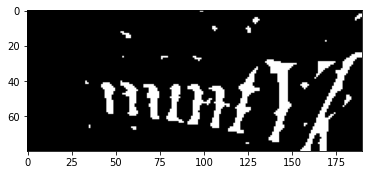

(190, 80, 1)


In [15]:
plt.imshow(X_train[0].reshape((80,190)),cmap='gray')
plt.show()
print(X_train[0].shape)

In [33]:
img_shape = (190, 80, 1)
model=create_model();
model.summary();

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 190, 80, 1)   0                                            
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 190, 80, 32)  320         input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 188, 78, 32)  9248        conv2d_40[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 188, 78, 32)  128         conv2d_41[0][0]                  
____________________________________________________________________________________________

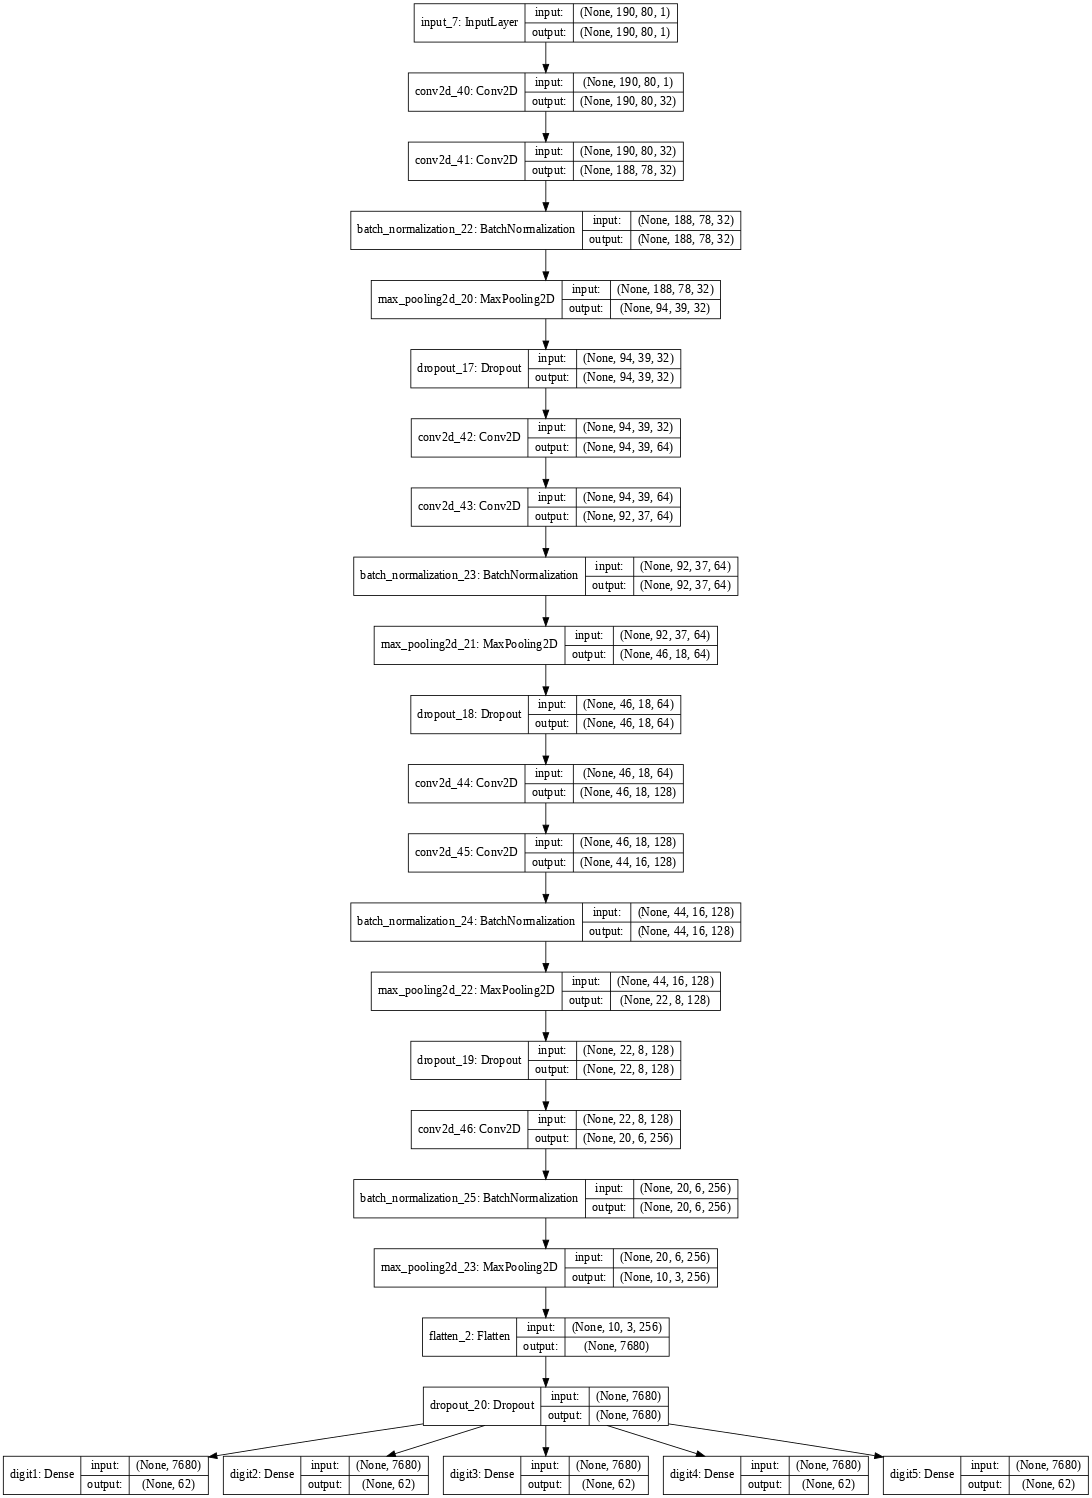

In [34]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [35]:
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2],y_train[3],y_train[4]], batch_size=16, epochs=150,verbose=1, validation_split=0.2,callbacks=[tensorboard_callback])

Train on 18400 samples, validate on 4600 samples
Epoch 1/150
18400/18400 [==============================] - 44s 2ms/step - loss: 28.6867 - digit1_loss: 5.8771 - digit2_loss: 5.6824 - digit3_loss: 5.5860 - digit4_loss: 5.7042 - digit5_loss: 5.8370 - digit1_acc: 0.0271 - digit2_acc: 0.0303 - digit3_acc: 0.0321 - digit4_acc: 0.0290 - digit5_acc: 0.0266 - val_loss: 29.8766 - val_digit1_loss: 5.8388 - val_digit2_loss: 5.7556 - val_digit3_loss: 6.1094 - val_digit4_loss: 6.2343 - val_digit5_loss: 5.9385 - val_digit1_acc: 0.0241 - val_digit2_acc: 0.0330 - val_digit3_acc: 0.0283 - val_digit4_acc: 0.0217 - val_digit5_acc: 0.0185
Epoch 2/150
18400/18400 [==============================] - 41s 2ms/step - loss: 19.3116 - digit1_loss: 4.0015 - digit2_loss: 3.7565 - digit3_loss: 3.6070 - digit4_loss: 3.8752 - digit5_loss: 4.0715 - digit1_acc: 0.0585 - digit2_acc: 0.0896 - digit3_acc: 0.1093 - digit4_acc: 0.0731 - digit5_acc: 0.0483 - val_loss: 18.3930 - val_digit1_loss: 3.6989 - val_digit2_loss: 3.480

In [19]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

NameError: ignored

<Figure size 864x504 with 0 Axes>

In [0]:
# Define function to predict captcha
def predict(filepath):
    img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
    #img = cv2.imread(os.path.join('data/', pic), cv2.IMREAD_UNCHANGED)
    blur = img.copy()
    blur.astype(dtype=np.uint8)
    for k in range(2):
        blur = cv2.blur(blur,(3,3))
        #blur = cv2.GaussianBlur(blur,(3,3),0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    ret,thresh2 = cv2.threshold(gray,115,180,cv2.THRESH_BINARY_INV)
    thresh2.astype(np.uint16)
    img = thresh2.copy()
    if img is not None:
        img = img / 255.0
    else:
        print("Not detected");
    #res = np.array(model.predict(img[np.newaxis, :, :, np.newaxis]))
    new_im = img.reshape((img.shape[1],img.shape[0]))
    res = np.array(model.predict(new_im[np.newaxis,:,:,np.newaxis]))
    #print(res)
    ans = np.reshape(res, (5, num_))
    l_ind = []
    probs = []
    for a in ans:
        l_ind.append(np.argmax(a))
        #probs.append(np.max(a))

    capt = ''
    for l in l_ind:
        capt += symbols[l]
    return capt#, sum(probs) / 5

In [0]:
total_img = 36
num_pr = 6 # number per row

counter = 1
plt.figure(figsize=(30,15))
plt.axis('off')
for item in png_files[:total_img]:
  image = cv2.imread(item, cv2.IMREAD_UNCHANGED)
  pred = predict(item)
  #print(pred)
  image_bckup = image.copy()
  plt.subplot(num_pr, num_pr, counter)
  #print("item => ",item)
  #print("item => ",str(item.split('_')[1]).split('/')[1])
  if str(item.split('_')[1]).split('/')[1] == str(pred):
    plt.title("Prediction = {}".format(pred),fontsize=20).set_color('green')
  else:
    plt.title("Prediction = {}".format(pred),fontsize=20).set_color('red')
  plt.axis('off')
  plt.imshow(image_bckup, cmap=plt.get_cmap('gray'))
  counter += 1
  #break
plt.show()

In [0]:
# download the model in computer for later use

model.save('data_captcha.h5')
# download the model from colab
from google.colab import files
files.download('data_captcha.h5')